In [1]:
import neptune.new as neptune
from utils import *
import numpy as np

import seaborn as sns


import ipywidgets as ipw
from ipywidgets.embed import embed_minimal_html

from matplotlib import pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
from tqdm import tqdm

def figures_to_html(figs, filename="dashboard.html"):
    dashboard = open(filename, 'w')
    dashboard.write("<html><head></head><body>" + "\n")
    for fig in figs:
        inner_html = fig.to_html().split('<body>')[1].split('</body>')[0]
        dashboard.write(inner_html)
    dashboard.write("</body></html>" + "\n")

In [2]:
project = neptune.get_project(
    name='rahatzamancse/MPSE-mds', 
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3NDk5MWVkNS0wMDg4LTRmNTktYWQyZC0zNzUyNTg0MTY1MGYifQ=='
)

# Get dashboard with runs contributed by 'sophia' tagged 'cycleLR'
run_table_df = project.fetch_runs_table(
    owner='rahatzamancse',
).to_pandas()

run_table_df.columns

Index(['sys/creation_time', 'sys/description', 'sys/failed', 'sys/hostname',
       'sys/id', 'sys/modification_time', 'sys/monitoring_time', 'sys/name',
       'sys/owner', 'sys/ping_time', 'sys/running_time', 'sys/size',
       'sys/state', 'sys/tags', 'GT/Points per perspective list',
       'Results/Alignment/4PointSample/error',
       'Results/Alignment/Global-RMSE-opt/error', 'Results/Final Cost',
       'Results/Final Individual Cost',
       'Results/computation history/Actual Iterations Run',
       'Results/computation history/Conclusion',
       'Results/computation history/costs',
       'Results/computation history/grads', 'Results/computation history/lrs',
       'Results/computation history/steps', 'parameters/DATASET',
       'parameters/INITIAL_EMBEDDING', 'parameters/MPSE/BATCH_SIZE',
       'parameters/MPSE/INITIAL_PROJECTIONS', 'parameters/MPSE/MAX_ITER',
       'parameters/MPSE/MIN_COST', 'parameters/MPSE/MIN_GRAD',
       'parameters/MPSE/SMART_INITIALIZATION',
 

In [3]:
cols = [
    'Results/Alignment/4PointSample/error',
    # 'Results/Alignment/4Point_ICP/error',
    'Results/Alignment/Global-RMSE-opt/error',
    # 'Results/Alignment/GlobalRMSE_ICP/error',
    'Results/Final Cost',
    'parameters/DATASET',
    'parameters/N_PERSPECTIVE',
    'parameters/PROJECTION/POINT_IN_ATLEAST',
    'parameters/N_POINTS',
    'parameters/MPSE/SMART_INITIALIZATION',
    'parameters/MPSE/VARIABLE_PROJECTION',
    'sys/id',
    'runtime',
    'parameters/PROJECTION/PROJ_TYPE'
]
colnames = [
    '4_point_error',
    # '4_point_icp_error',
    'rmse_error',
    # 'rmse_ICP_error',
    'mpse_error',
    'dataset',
    '# perspectives',
    'points in exactly # perspectives',
    '#points',
    'smart_init',
    'variable projection',
    'exp_id',
    'runtime',
    'proj_type'
]

plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'atleast_in_n_persp'
][cols]

plot_df.columns = colnames

nulcols = colnames.copy()
nulcols.remove('runtime')

plot_df = plot_df.dropna(axis=0, subset=nulcols)
plot_df['perspective_percentage'] = plot_df['points in exactly # perspectives'] / plot_df['# perspectives']

plot_df.head()

4_point_error  rmse_error  mpse_error                 dataset  \
400       0.000180    0.000185    0.011516   ModelNet10:chair:0001   
401       0.000096    0.000102    0.009650  ModelNet10:toilet:0001   
402       0.000105    0.000117    0.009461  ModelNet10:toilet:0001   
403       0.000092    0.000113    0.008328  ModelNet10:toilet:0001   
404       0.000089    0.000104    0.008714  ModelNet10:toilet:0001   

     # perspectives  points in exactly # perspectives  #points smart_init  \
400             8.0                               4.0    256.0       True   
401            12.0                               6.0    256.0       True   
402            12.0                               6.0    256.0       True   
403            11.0                               6.0    256.0       True   
404            11.0                               6.0    256.0       True   

    variable projection        exp_id    runtime           proj_type  \
400                True  MPSEMDS-6103  13.997701  atleast_in_n_persp   
401               False  MPSEMDS-6102        NaN  atleast_in_n_persp   
402                True  MPSEMDS-6101        NaN  atleast_in_n_persp   
403               False  MPSEMDS-6100        NaN  atleast_in_n_persp   
404                True  MPSEMDS-6099        NaN  atleast_in_n_persp   

     perspective_percentage  
400                0.500000  
401                0.500000  
402                0.500000  
403                0.545455  
404                0.545455

In [4]:
plot_df.dataset.unique()

array(['ModelNet10:chair:0001', 'ModelNet10:toilet:0001',
       'ModelNet10:table:0002', 'ModelNet10:sofa:0019',
       'ModelNet10:night_stand:0010', 'ModelNet10:monitor:0016',
       'ModelNet10:monitor:0003', 'ModelNet10:dresser:0001',
       'ModelNet10:bathtub:0050', 'ModelNet10:bathtub:0005',
       'ModelNet10:bed:0003', 'ModelNet10:bed:0005',
       'ModelNet10:bed:0001', 'ModelNet10:desk:0013',
       'ModelNet10:desk:0006', 'ModelNet10:desk:0005'], dtype=object)

/tmp/ipykernel_24967/2702926137.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


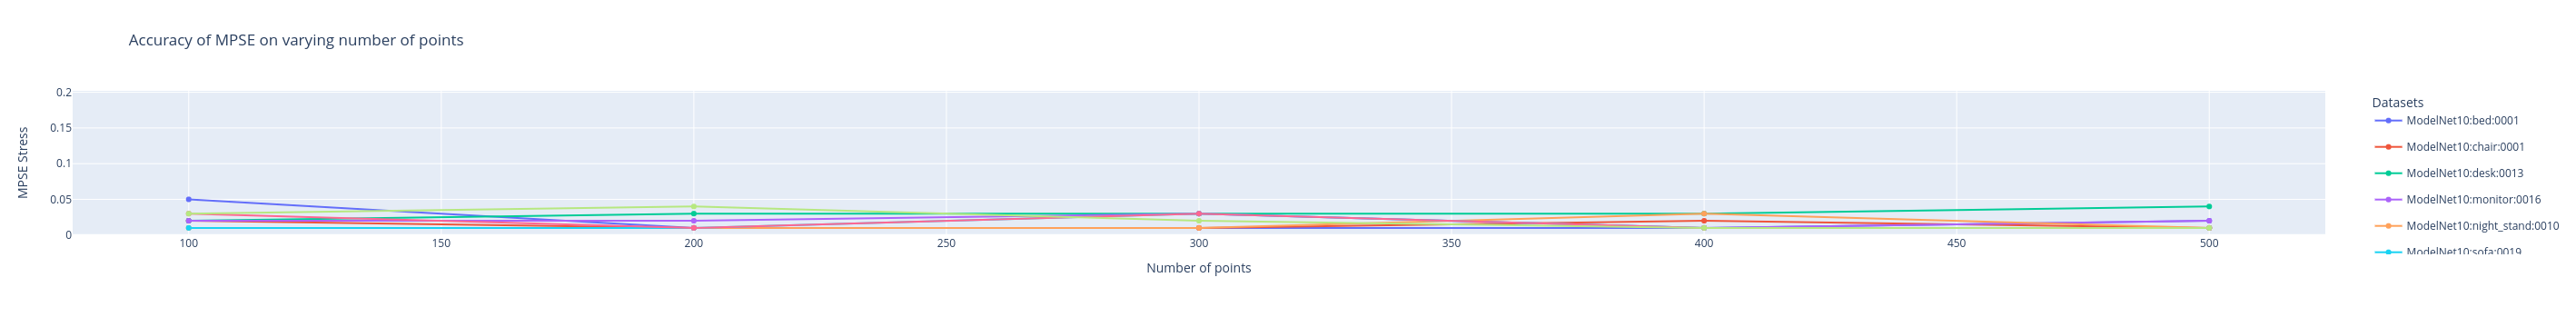

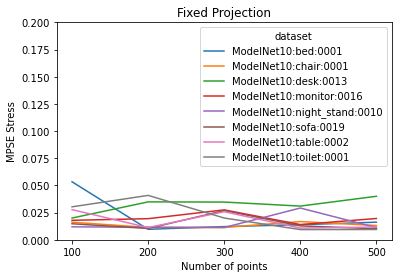

In [5]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (~plot_df['#points'].isin([512, 256])) & plot_df['dataset'].isin(datasets_to_take)
]
clip_val = 0.2
y = 'mpse_error'
plot_area=False
x = '#points'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of points',
    xaxis_title='Number of points',
    yaxis_title='MPSE Stress',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
g.set_xticks([100, 200, 300, 400, 500])
g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Number of points")
g.set_ylabel("MPSE Stress")
g.set(title='Fixed Projection')
plt.savefig("figures/points_fixed_stress.eps")

fig.show()

/tmp/ipykernel_24967/1040033327.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


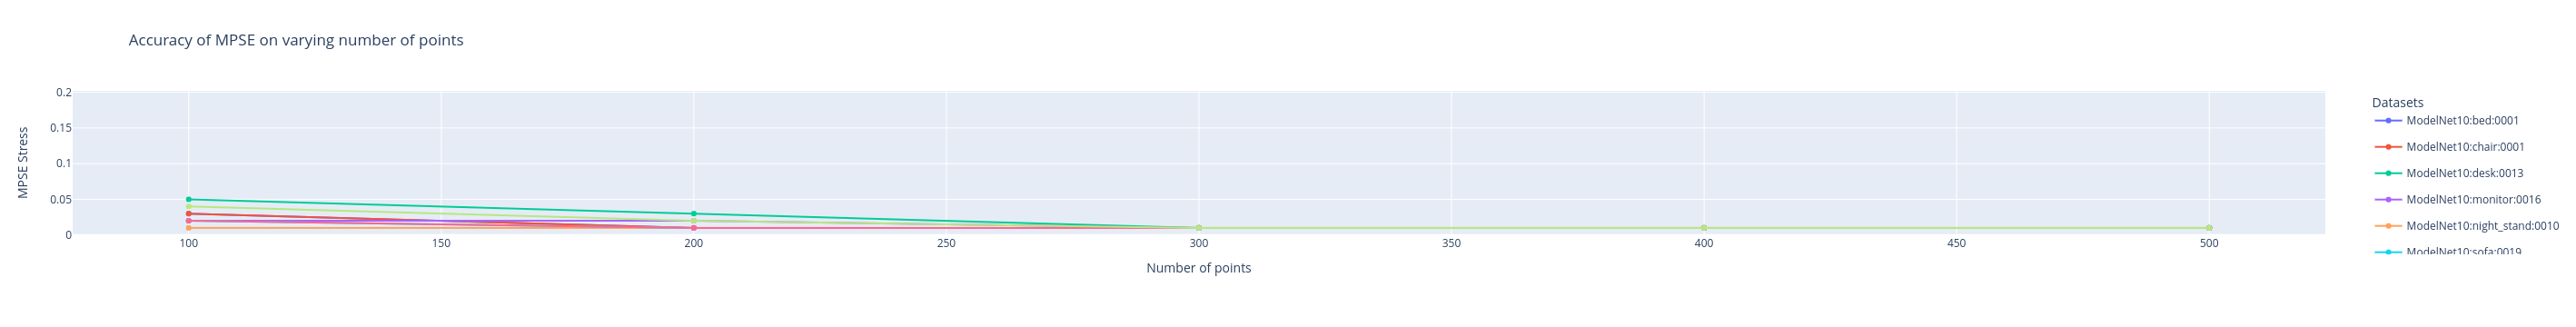

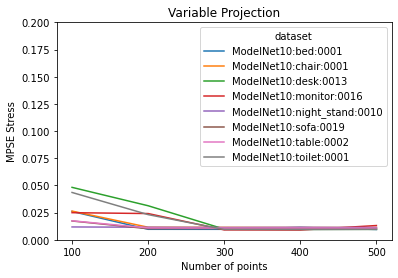

In [6]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (~plot_df['#points'].isin([512, 256])) & plot_df['dataset'].isin(datasets_to_take)
]
clip_val = 0.2
y = 'mpse_error'
plot_area=False
x = '#points'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of points',
    xaxis_title='Number of points',
    yaxis_title='MPSE Stress',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
g.set_xticks([100, 200, 300, 400, 500])
g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Number of points")
g.set_ylabel("MPSE Stress")
g.set(title='Variable Projection')
plt.savefig("figures/points_variable_stress.eps")

fig.show()

/tmp/ipykernel_24967/1868828761.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


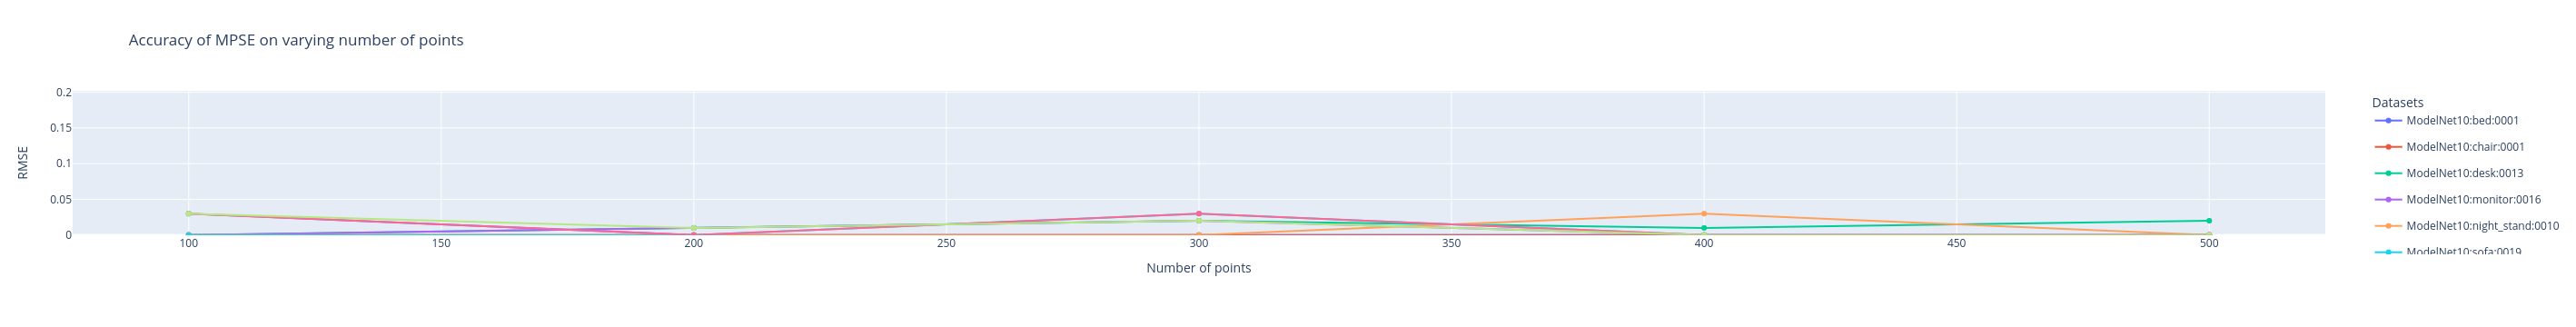

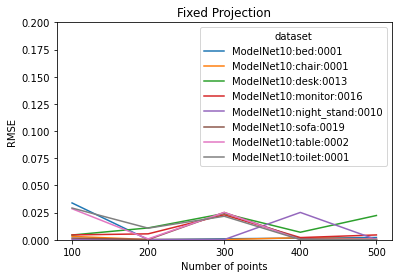

In [7]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (~plot_df['#points'].isin([512, 256])) & plot_df['dataset'].isin(datasets_to_take)
]
clip_val = 0.2
y = 'rmse_error'
plot_area=False
x = '#points'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of points',
    xaxis_title='Number of points',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
g.set_xticks([100, 200, 300, 400, 500])
g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Number of points")
g.set_ylabel("RMSE")
g.set(title='Fixed Projection')
plt.savefig("figures/points_fixed_rmse.eps")

fig.show()

/tmp/ipykernel_24967/1956505442.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


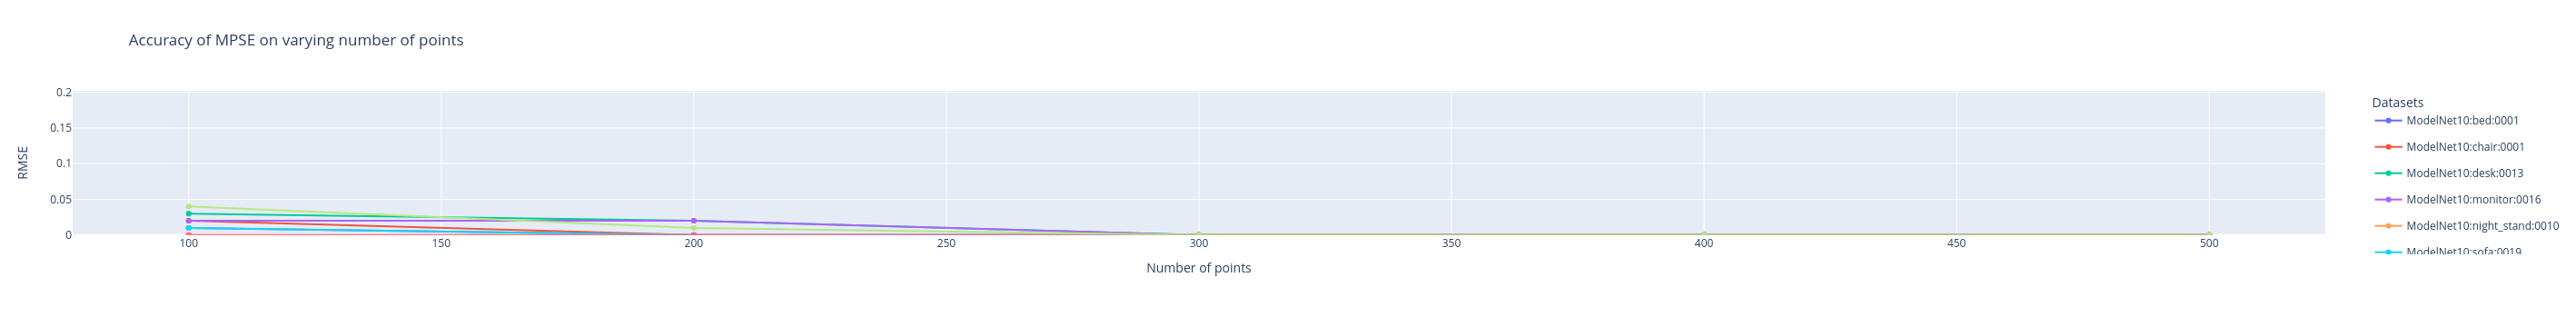

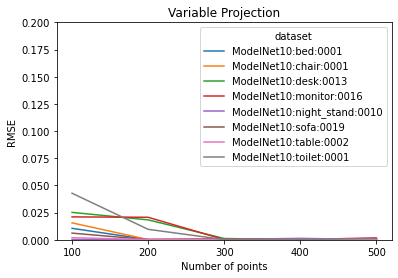

In [8]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (~plot_df['#points'].isin([512, 256])) & plot_df['dataset'].isin(datasets_to_take)
]
clip_val = 0.2
y = 'rmse_error'
plot_area=False
x = '#points'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of points',
    xaxis_title='Number of points',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
g.set_xticks([100, 200, 300, 400, 500])
g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Number of points")
g.set_ylabel("RMSE")
g.set(title='Variable Projection')
plt.savefig("figures/points_variable_rmse.eps")

fig.show()

/tmp/ipykernel_24967/1880301969.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


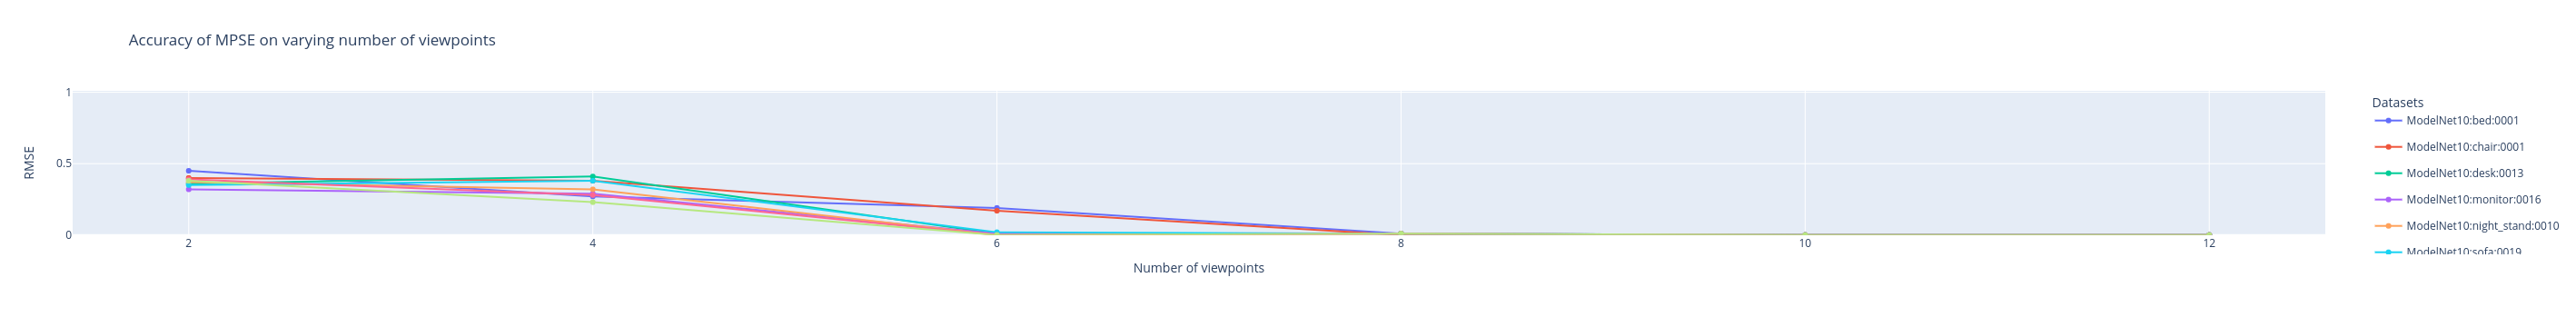

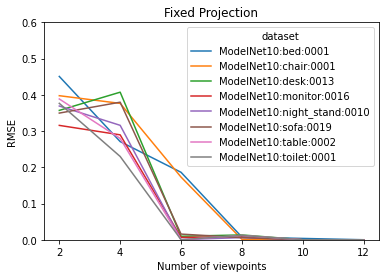

In [9]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (plot_df['points in exactly # perspectives'] == plot_df['# perspectives']/2)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.6))
g.set_xlabel("Number of viewpoints")
g.set_ylabel("RMSE")
g.set(title='Fixed Projection')
plt.savefig("figures/viewpoints_fixed_rmse.eps")

fig.show()

/tmp/ipykernel_24967/440525901.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


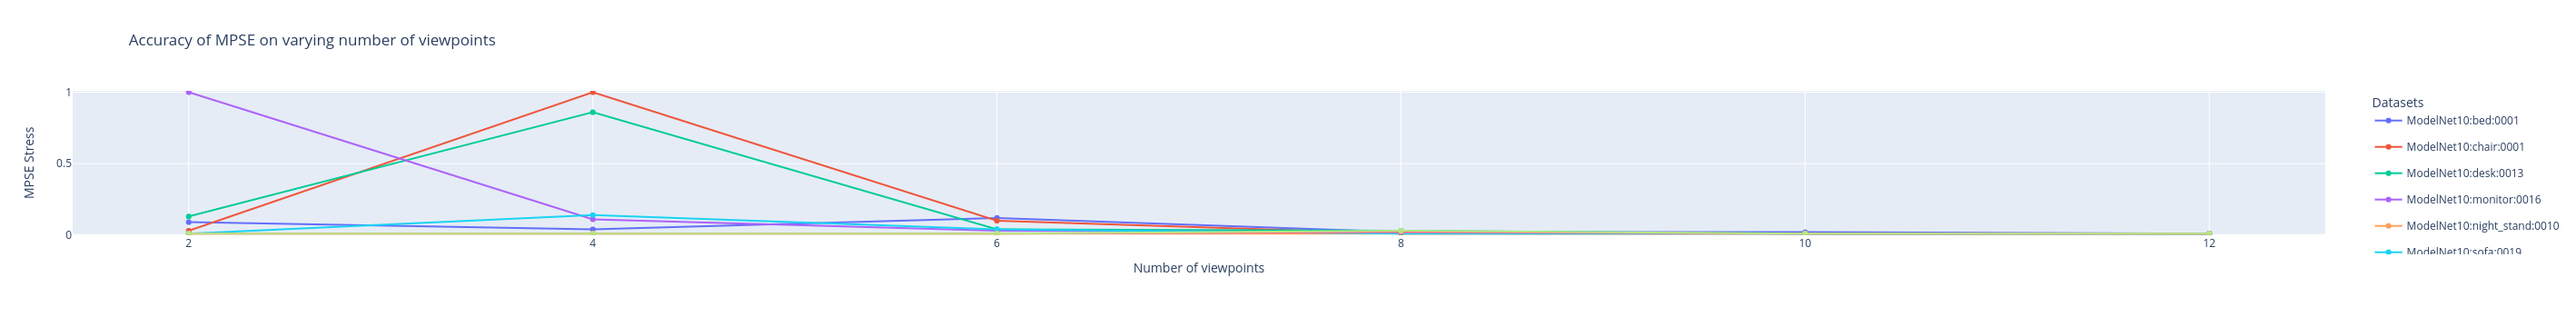

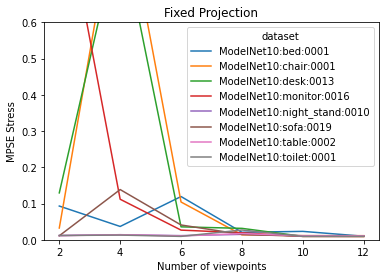

In [10]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (plot_df['points in exactly # perspectives'] == plot_df['# perspectives']/2)
]

clip_val = 1
y = 'mpse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='MPSE Stress',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.6))
g.set_xlabel("Number of viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Fixed Projection')
plt.savefig("figures/viewpoints_fixed_stress.eps")

fig.show()

/tmp/ipykernel_24967/2505248173.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


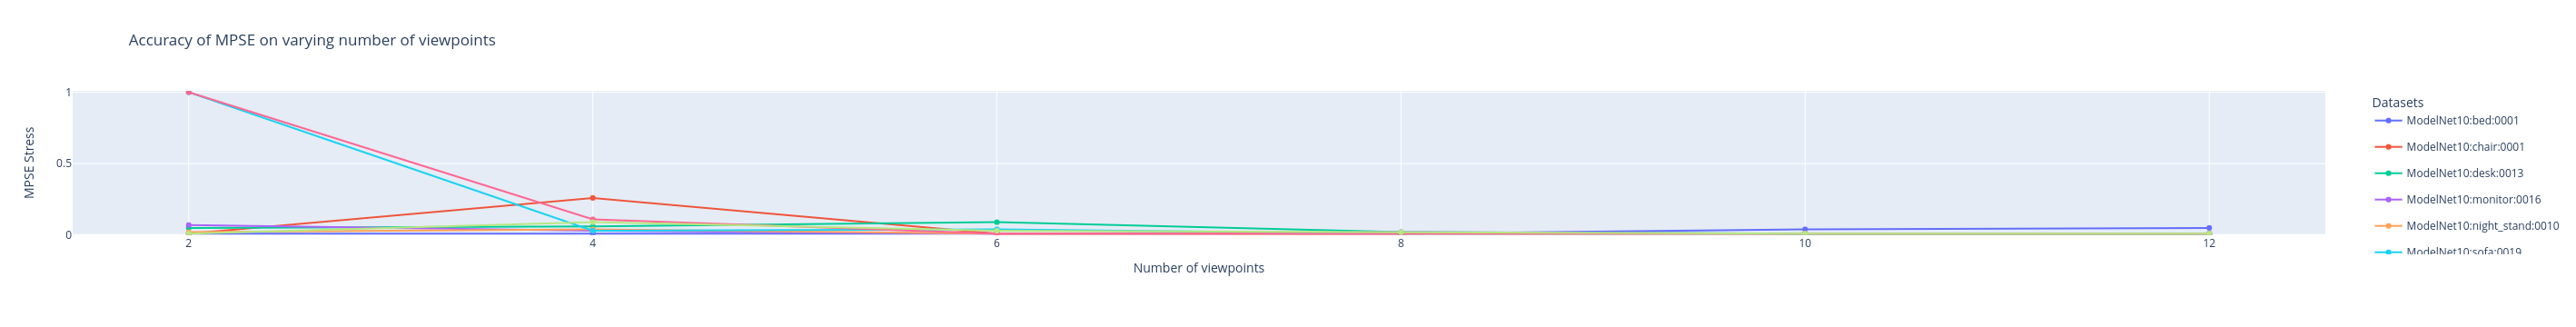

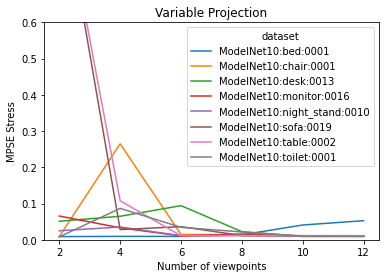

In [11]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (plot_df['points in exactly # perspectives'] == plot_df['# perspectives']/2)
]

clip_val = 1
y = 'mpse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='MPSE Stress',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.6))
g.set_xlabel("Number of viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Variable Projection')
plt.savefig("figures/viewpoints_variable_stress.eps")

fig.show()

/tmp/ipykernel_24967/29875527.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


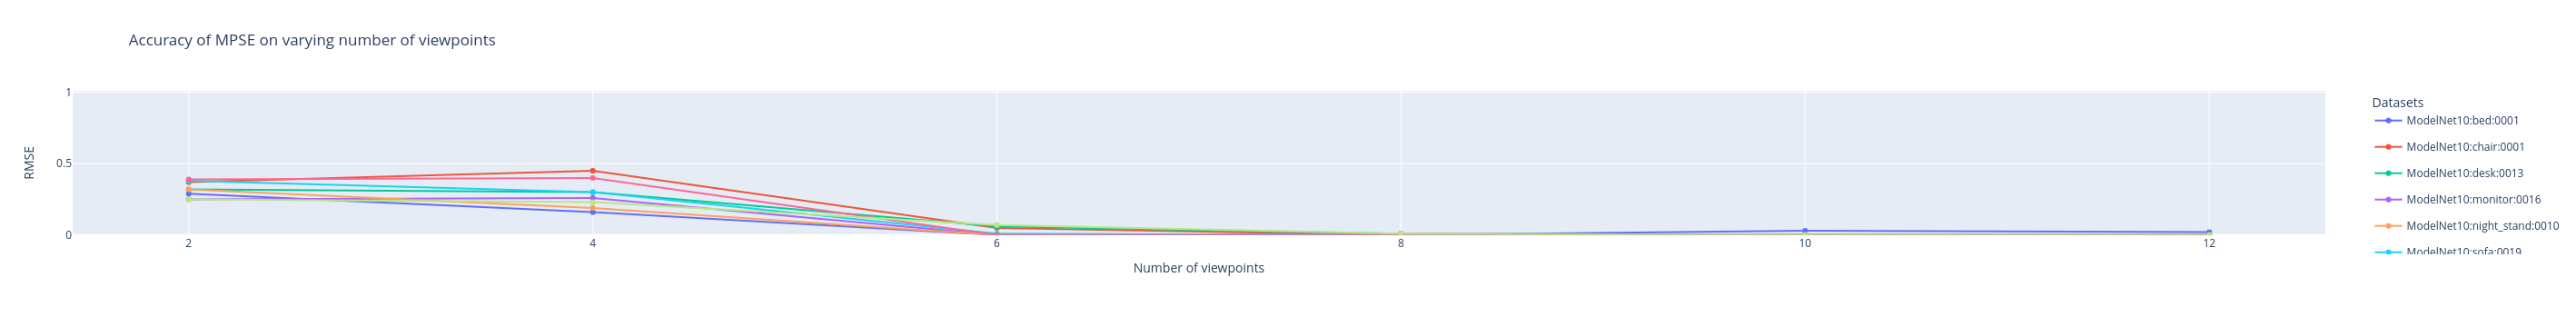

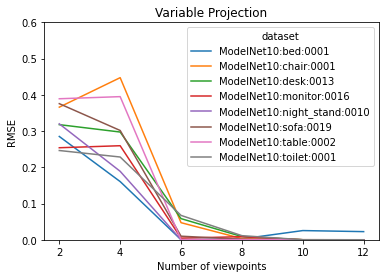

In [12]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013', 
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (plot_df['points in exactly # perspectives'] == plot_df['# perspectives']/2)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.6))
g.set_xlabel("Number of viewpoints")
g.set_ylabel("RMSE")
g.set(title='Variable Projection')
plt.savefig("figures/viewpoints_variable_rmse.eps")

fig.show()

/tmp/ipykernel_24967/3157187450.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


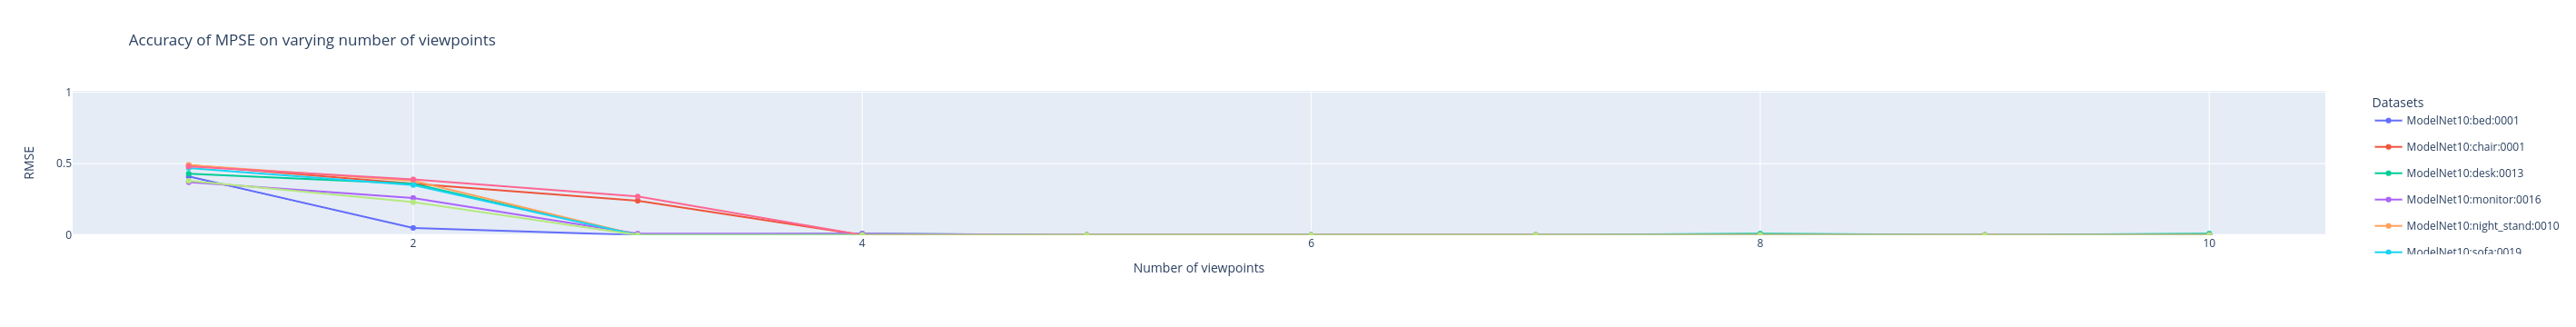

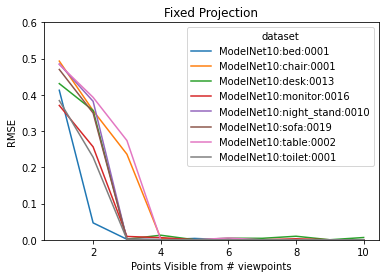

In [13]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (plot_df['# perspectives'] == 10)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = 'points in exactly # perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.6))
g.set_xlabel("Points Visible from # viewpoints")
g.set_ylabel("RMSE")
g.set(title='Fixed Projection')
plt.savefig("figures/pointsinviewpoint_fixed_rmse.eps")

fig.show()

/tmp/ipykernel_24967/2428173718.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


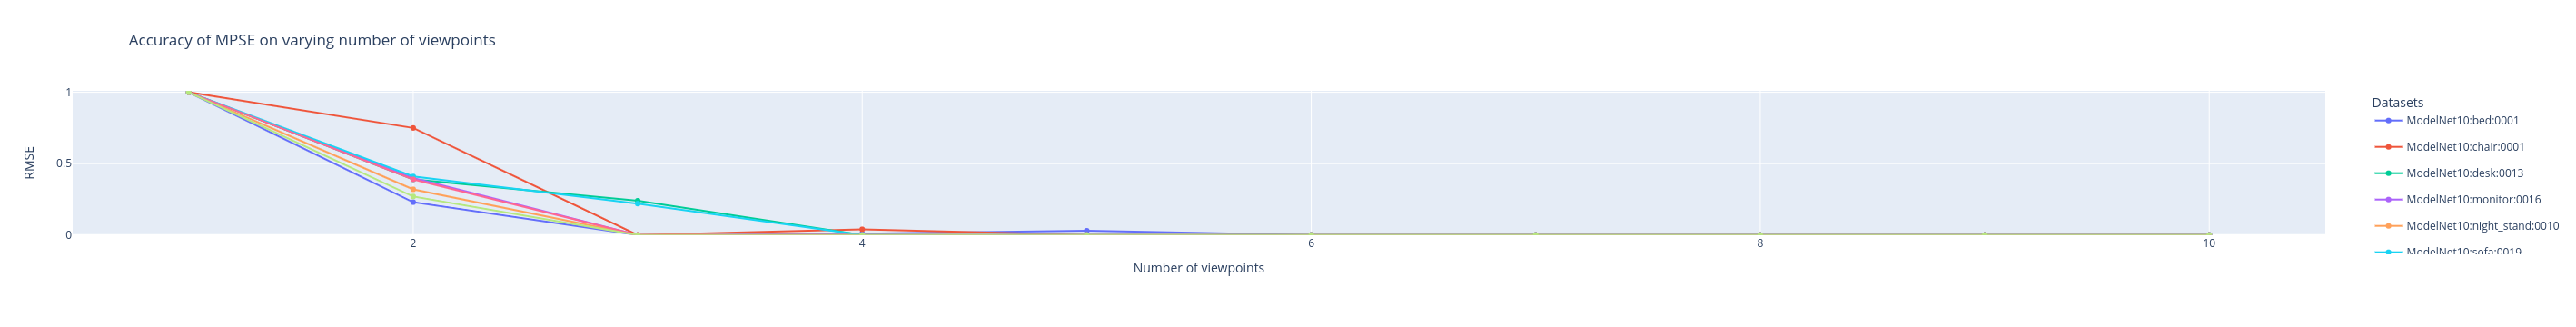

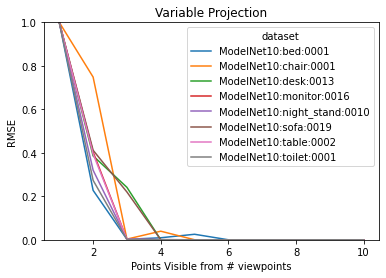

In [14]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (plot_df['# perspectives'] == 10)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = 'points in exactly # perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,1))
g.set_xlabel("Points Visible from # viewpoints")
g.set_ylabel("RMSE")
g.set(title='Variable Projection')
plt.savefig("figures/pointsinviewpoint_variable_rmse.eps")

fig.show()

/tmp/ipykernel_24967/1320530970.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


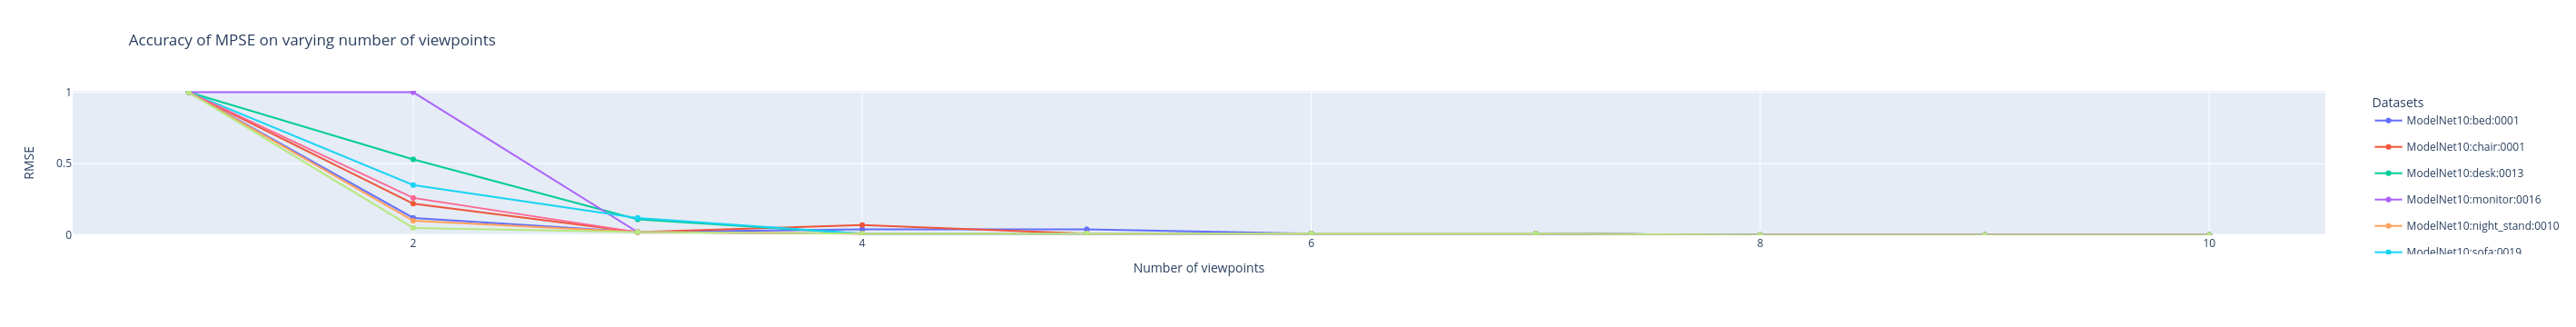

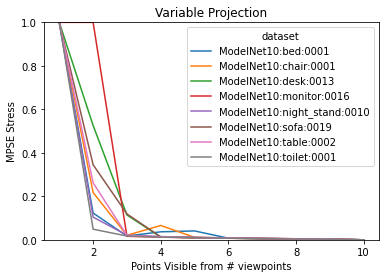

In [15]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == True) & (plot_df['# perspectives'] == 10)
]

clip_val = 1
y = 'mpse_error'
plot_area=False
x = 'points in exactly # perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,1))
g.set_xlabel("Points Visible from # viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Variable Projection')
plt.savefig("figures/pointsinviewpoint_variable_stress.eps")

fig.show()

/tmp/ipykernel_24967/3685753329.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


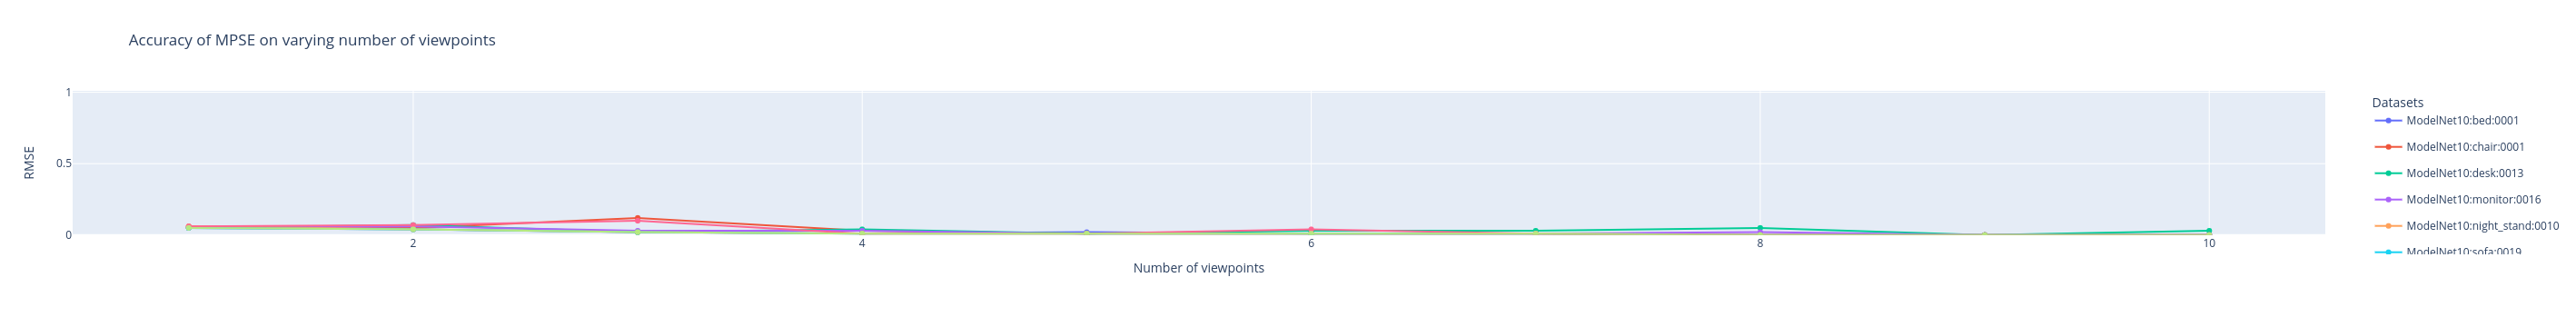

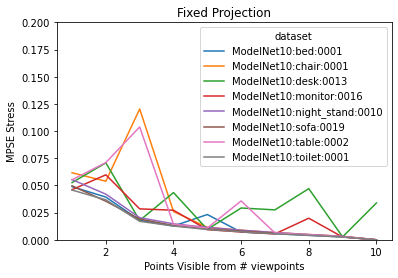

In [16]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (plot_df['# perspectives'] == 10)
]

clip_val = 1
y = 'mpse_error'
plot_area=False
x = 'points in exactly # perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Points Visible from # viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Fixed Projection')
plt.savefig("figures/pointsinviewpoint_fixed_stress.eps")

fig.show()

/tmp/ipykernel_24967/3268905204.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



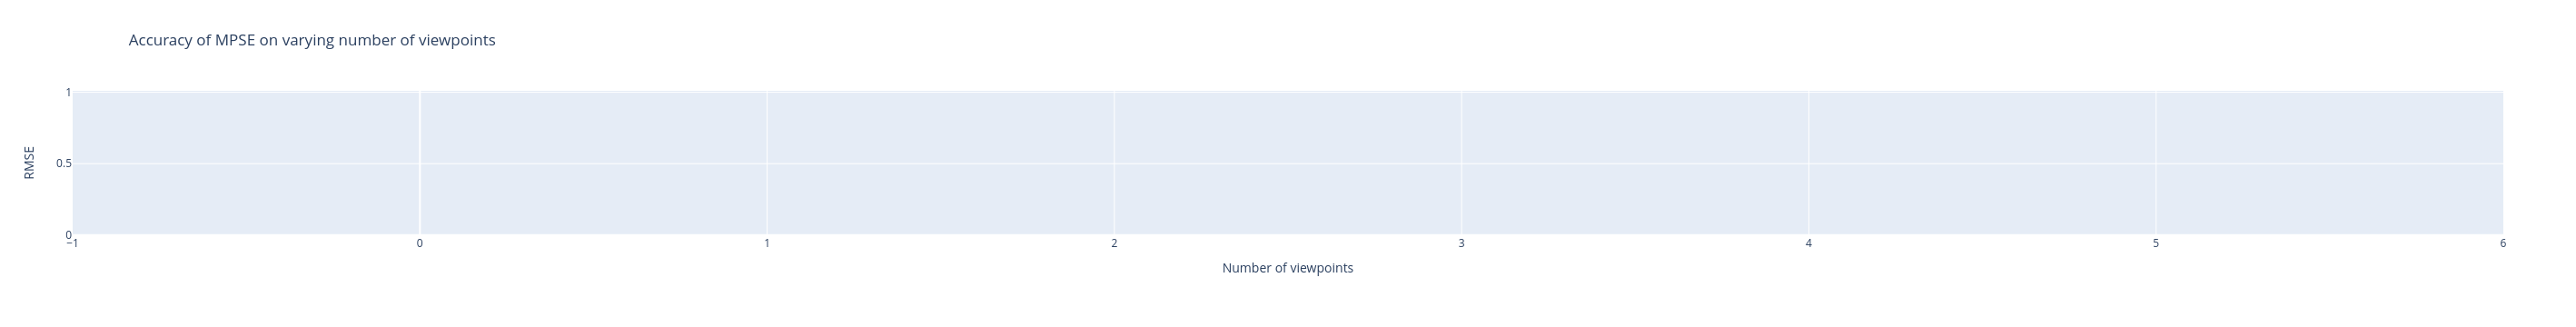

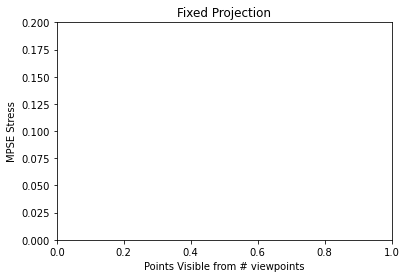

In [20]:
datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'atleast_in_n_persp') & (plot_df['variable projection'] == False) & (~plot_df['runtime'].isnull())
]

clip_val = 1
y = 'runtime'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Points Visible from # viewpoints")
g.set_ylabel("MPSE Stress")
g.set(title='Fixed Projection')
plt.savefig("figures/viewpoint_fixed_time.eps")

fig.show()

/tmp/ipykernel_24967/313954070.py:34: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


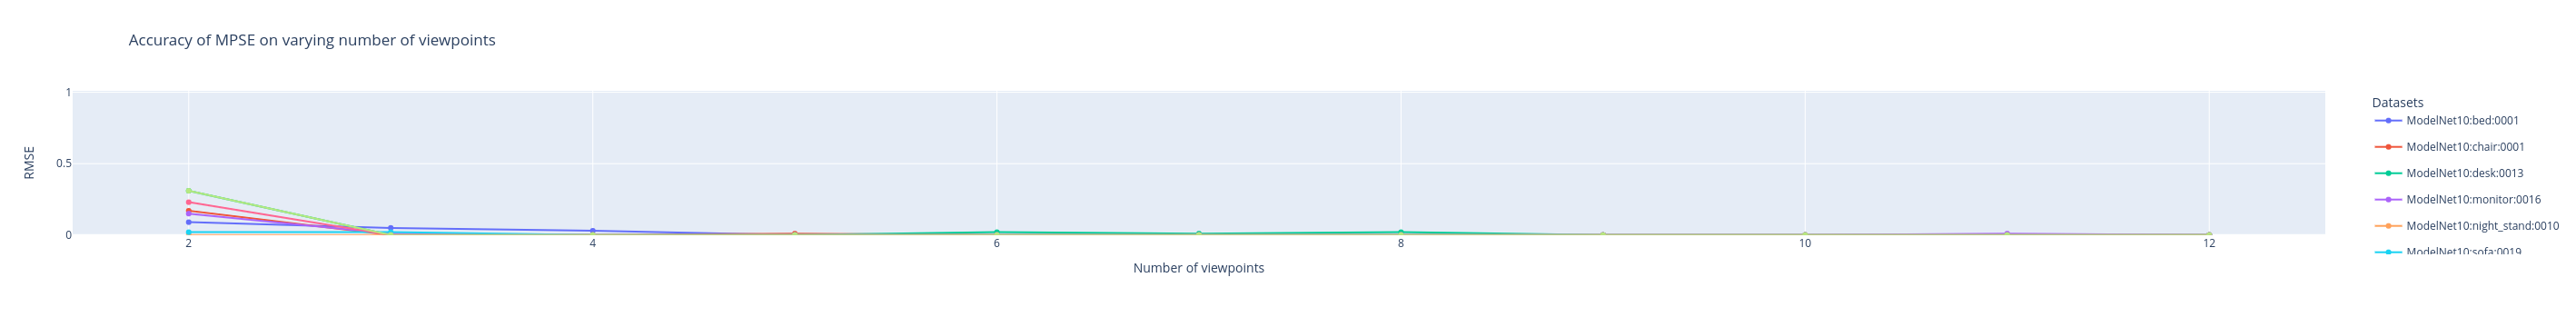

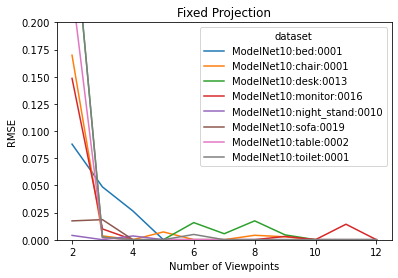

In [17]:
plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'raytracing'
][cols]

plot_df.columns = colnames
plot_df = plot_df.drop(['points in exactly # perspectives'], axis=1)

nulcols = colnames.copy()
nulcols.remove('runtime')
nulcols.remove('points in exactly # perspectives')
plot_df = plot_df.dropna(axis=0, subset=nulcols)

datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'raytracing') & (plot_df['variable projection'] == False) & (plot_df['#points'] == 256)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Number of Viewpoints")
g.set_ylabel("RMSE")
g.set(title='Fixed Projection')
plt.savefig("figures/viewpoints_fixed_raytracing_rmse.eps")

fig.show()

/tmp/ipykernel_24967/3557952760.py:34: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


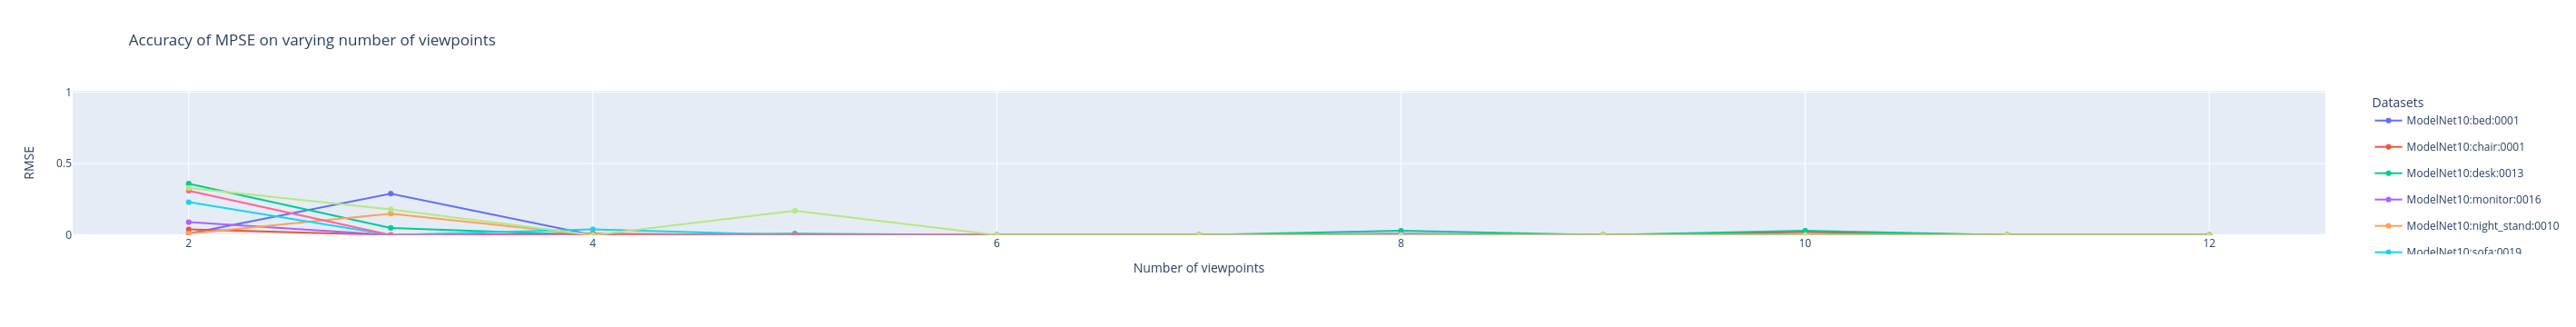

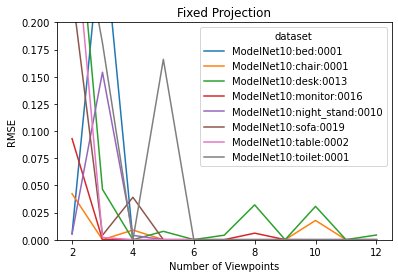

In [18]:
plot_df = run_table_df[
    run_table_df['parameters/PROJECTION/PROJ_TYPE'] == 'raytracing'
][cols]

plot_df.columns = colnames
plot_df = plot_df.drop(['points in exactly # perspectives'], axis=1)

nulcols = colnames.copy()
nulcols.remove('runtime')
nulcols.remove('points in exactly # perspectives')
plot_df = plot_df.dropna(axis=0, subset=nulcols)

datasets_to_take = [
    # 'ModelNet10:desk:0005', 
    'ModelNet10:chair:0001',
    'ModelNet10:toilet:0001',
    'ModelNet10:table:0002',
    'ModelNet10:sofa:0019', 
    'ModelNet10:night_stand:0010',
    'ModelNet10:monitor:0016', 
    # 'ModelNet10:monitor:0003',
    # 'ModelNet10:dresser:0001', 
    # 'ModelNet10:bathtub:0050',
    # 'ModelNet10:bathtub:0005', 
    # 'ModelNet10:bed:0003',
    # 'ModelNet10:bed:0005', 
    'ModelNet10:bed:0001',
    'ModelNet10:desk:0013',
    # 'ModelNet10:desk:0006'
]

df = plot_df[plot_df['dataset'].isin(datasets_to_take)]

df = df[
    (plot_df['proj_type'] == 'raytracing') & (plot_df['variable projection'] == True) & (plot_df['#points'] == 256)
]

clip_val = 1
y = 'rmse_error'
plot_area=False
x = '# perspectives'

df[y] = df[y].apply(lambda x: clip_val if x > clip_val else x)

agg_col_dict = {}

agg_fns = ['mean', 'min', 'max', 'median', 'count']
for agg_fn in agg_fns:
    agg_col_dict[f'{y}_{agg_fn}'] = (y, agg_fn)
df['exp_id_error'] = f'<a href="https://app.neptune.ai/rahatzamancse/MPSE-mds/e/{df["exp_id"].astype(str)}/all">' + df['exp_id'].astype(str) + '</a> (' + df[y].round(2).astype(str) + ')<br>'
agg_col_dict['exp_ids'] = ('exp_id_error', lambda x: ' '.join(x))

aggregated_plot_df = df.groupby(['dataset', x]).agg(**agg_col_dict).reset_index()

melted_viz_df = aggregated_plot_df.melt(id_vars = ['dataset', x])
melted_viz_df = melted_viz_df.sort_values([x, 'dataset', 'variable', 'value'])

color_palette = [[int(color.strip('#')[i:i+2], 16) for i in (0, 2, 4)] for color in px.colors.qualitative.Plotly]

fig = make_subplots(
    rows=2, cols=1,
    # row_heights=[0.8, 0.2],
    row_heights=[0.009, 0.001],
    vertical_spacing = 0.02,
    shared_yaxes=False,
    # shared_xaxes=True,
)

for i, dataset in enumerate(melted_viz_df['dataset'].unique()):

    single_dataset_melted_df = melted_viz_df[melted_viz_df['dataset'] == dataset]

    X = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])[x].tolist()]
    Y_mean = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_mean'])["value"].tolist()]
    Y_upper = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_max'])["value"].tolist()]
    Y_lower = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_min'])["value"].tolist()][::-1]
    Y_median = [round(elem, 2) for elem in (single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_median'])["value"].tolist()]

    for idx, (y_up, y_lo) in enumerate(zip(Y_upper, Y_lower)):
        if y_up <= y_lo:
            Y_lower[idx] -= y_up - 0.1

    X_rev = X[::-1]

    color = color_palette[i % len(color_palette)]
    line_color = 'rgb('+','.join(str(c) for c in color)+')'
    area_color = 'rgba('+','.join(str(min(max(c,0), 255)) for c in color)+',0.2)'
    median_color = 'rgba('+','.join(str(min(max(c + 20,0), 255)) for c in color)+',0.8)'

    if plot_area:
        fig.add_trace(go.Scatter(
            x=X+X_rev,
            y=Y_upper+Y_lower,
            fill='toself',
            fillcolor=area_color,
            line_color=area_color,
            showlegend=False,
            name=f'{dataset}',
            legendgroup=f'{dataset}',
            hoverinfo='none',
        ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=X, y=Y_mean,
        line_color=line_color,
        name=dataset,
        showlegend=True,
        legendgroup=f'{dataset}',
        connectgaps=True,
        hovertemplate = y + ': %{y:.2f}<br>%{text} <extra></extra>',
        text=['Number of experiments done : ' + str(int(row1['value'])) + '<br><b>Experiment IDs</b> : <br>' + (row2['value'])
              for (i1, row1),(i2,row2) in zip(
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count'].iterrows(),
                  single_dataset_melted_df[single_dataset_melted_df['variable'] == f'exp_ids'].iterrows(),

              )],
        hoverinfo='none'
    ), row=1, col=1)
    # fig.add_trace(go.Scatter(
    #     x=X, y=Y_median,
    #     name=f'{dataset}',
    #     line = dict(color=median_color, dash='dash'),
    #     showlegend=False,
    #     legendgroup=f'{dataset}',
    #     connectgaps=True,
    #     hoverinfo='none',
    # ), row=1, col=1)

#     fig.add_trace(
#         go.Bar(
#             x=X,
#             y=single_dataset_melted_df[single_dataset_melted_df['variable'] == f'{y}_count']['value'],
#             hoverinfo='none',
#             marker_color=line_color,
#             showlegend=False,
#             legendgroup=f'{dataset}',
#         ),
#         row=2, col=1
#     )

fig.update_layout(
    title='Accuracy of MPSE on varying number of viewpoints',
    xaxis_title='Number of viewpoints',
    yaxis_title='RMSE',
    legend_title="Datasets",
    hovermode="x unified",
    barmode='group',
    # layout_yaxis_range=[0,clip_val+5]
)
fig.update_layout(yaxis1 = dict(range=[0,clip_val+clip_val*0.01]))

g = sns.lineplot(data=aggregated_plot_df, x=x, y=y + "_mean", hue='dataset')
# g.set_xticks([100, 200, 300, 400, 500])
# g.set_xticklabels([100, 200, 300, 400, 500])
g.set(ylim=(0,0.2))
g.set_xlabel("Number of Viewpoints")
g.set_ylabel("RMSE")
g.set(title='Fixed Projection')
plt.savefig("figures/viewpoints_variable_raytracing_rmse.eps")

fig.show()